# Red Wine Quality
Author: Morariu Tudor

## Citirea si procesarea Datelor

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv");

display(data);

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Plotarea Datelor

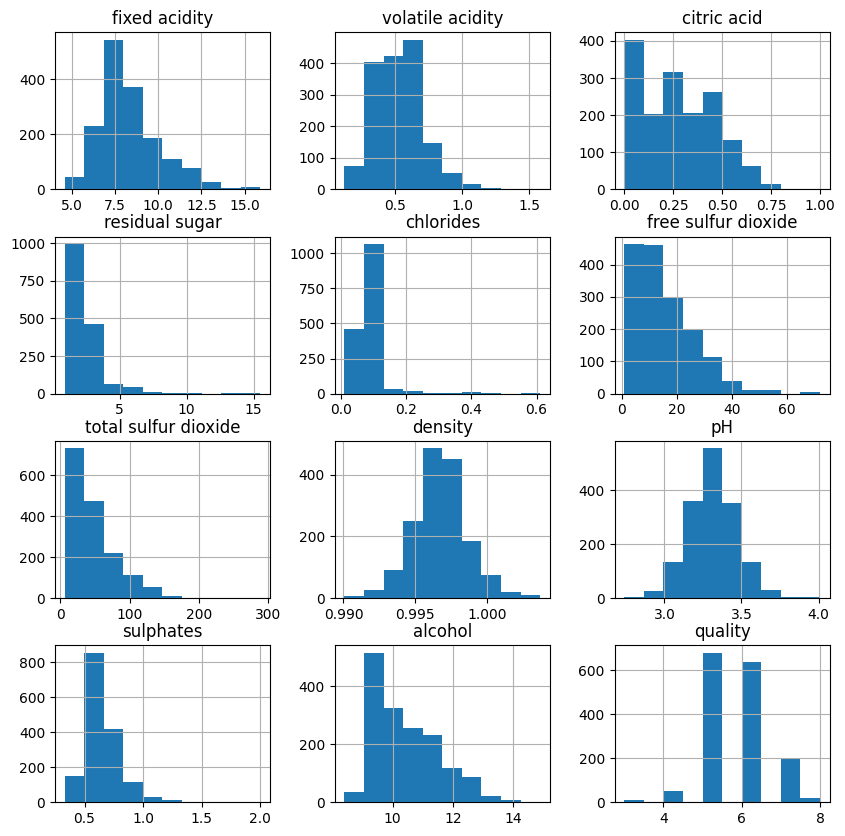

In [71]:
data.hist(figsize=(10, 10));

## Plot cu PCA

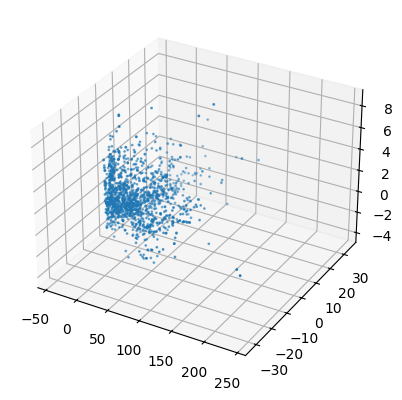

In [72]:
from sklearn.decomposition import PCA

ax = plt.figure().add_subplot(projection='3d')

pca = PCA(n_components=3);

points = pca.fit_transform(data.drop(columns=["quality"]));

pointsx = [];
pointsy = [];
pointsz = [];

for x, y, z in points:
    pointsx.append(x);
    pointsy.append(y);
    pointsz.append(z);

ax.scatter(pointsx, pointsy, pointsz, s=1);



## Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2);

## Regresie

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = RandomForestClassifier(max_depth=20, random_state=0)

reg.fit(train.drop(columns=["quality"]), train["quality"]);
print(r2_score(test["quality"], reg.predict(test.drop(columns=["quality"]))));


0.4194988836516994


## NN test

In [75]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU
import keras
from keras import layers

Model = Sequential()

Model.add(Dense(100, input_dim = 11), "relu")
Model.add(Dense(50), "relu")
Model.add(Dense(1), "relu")

opt = keras.optimizers.SGD(learning_rate=0.000001)

Model.compile(loss='mean_squared_error', optimizer=opt)
Model.summary()


/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301 (24.61 KB)

 Trainable params: 6,301 (24.61 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:


print(Model.predict(train.drop(columns=["quality"])));
print(train["quality"])


history = Model.fit(train.drop(columns=["quality"]), train["quality"], epochs=100, batch_size=5)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[ 4.2114897]
 [12.630009 ]
 [13.900587 ]
 ...
 [ 7.290606 ]
 [ 5.9859643]
 [ 9.305292 ]]
1299    3
1525    5
609     6
166     5
633     4
       ..
445     6
780     6
554     5
1097    5
1433    7
Name: quality, Length: 1279, dtype: int64
Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 35.6719
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 7.1890
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 5.2034
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 3.4414
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 2.6318
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 2.0393
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.7662
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.3836
Epoch 9/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1929
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.9924
Epoch 11/100
256/

## $R^2$ score $MSE$ error

In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

print("R2 score: ", r2_score(test["quality"], Model.predict(test.drop(columns=["quality"]))));
print("MSE error: ", mean_squared_error(test["quality"], Model.predict(test.drop(columns=["quality"]))));


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
R2 score:  0.251470685005188
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
MSE error:  0.4714565281800496
